<a href="https://colab.research.google.com/github/EduardoMoraesRitter/deep-learning-tensorflow-python/blob/main/5_Classificacao_sentimentos_reviews_alexa_DL_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#definição do problema

classificar o reviews de 3000 comentarios dos clientes da Alexa, realizando uma analise de sentimentos.

https://www.kaggle.com/sid321axn/amazon-alexa-reviews

#tokenização

transforma palavras em tabela.

depois verificar em uma frase a frequencia de palavras.

In [38]:
#extrair feature de texto
from sklearn.feature_extraction.text import CountVectorizer

In [43]:
data = ['this is the first document,','and this is the third one this.']
data

['this is the first document,', 'and this is the third one this.']

In [44]:
vetor = CountVectorizer()
X = vetor.fit_transform(data)

#cada frase ele colocar quantidade de vezes e onde na matriz aparece a palavra
print(X.toarray())

[[0 1 1 1 0 1 0 1]
 [1 0 0 1 1 1 1 2]]


In [41]:
#palavras unicas
vetor.get_feature_names()

['and', 'document', 'first', 'is', 'one', 'the', 'third', 'this']

#matriz de confusão
para avaliar os algoritimos de classificação

*   TP - verdadeiro positivo
*   TN - verdadeiro negativo
*   FP - falso positivo
*   FN - falso negativo


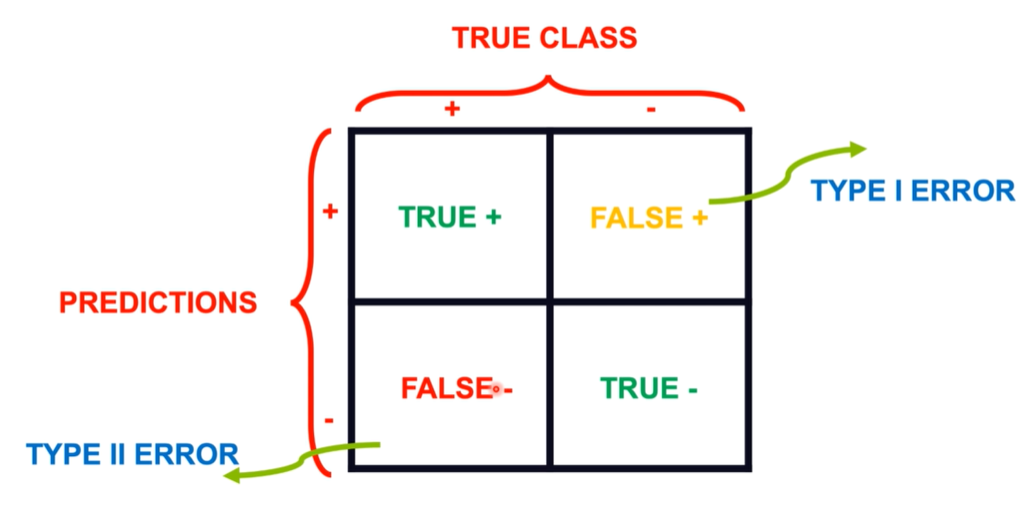

#Metricas de Avaliação

TP | FP

FN | TN

*   Accuracy = (TP+TN)/(TP+TN+FP+FN)
*   Error Rate = (FP+FN)/(TP+TN+FP+FN)
*   Precision = TP/(TP+FP)
  *   quanto o modelo previu Verdadeiro(T), e quanto estava Correto(P)?
*   Recall = TP/(TP+FN)
  *   quantas classes Verdadeiras(T), o quanto o modelo acertou(P)?

# Etapa 1: bibliotecas


In [1]:
%tensorflow_version 2.x
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
tf.__version__

'2.4.1'

# Etapa 2: Importação

In [2]:
#colocar o separador de \t, a tabulação ou tab
df = pd.read_csv('https://raw.githubusercontent.com/EduardoMoraesRitter/deep-learning-tensorflow-python/main/data/amazon-alexa.tsv', sep='\t')
#remover o indece
df.reset_index(drop=True, inplace=True)
df

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


In [3]:
df.keys()

Index(['rating', 'date', 'variation', 'verified_reviews', 'feedback'], dtype='object')

In [4]:
df.verified_reviews

0                                           Love my Echo!
1                                               Loved it!
2       Sometimes while playing a game, you can answer...
3       I have had a lot of fun with this thing. My 4 ...
4                                                   Music
                              ...                        
3145    Perfect for kids, adults and everyone in betwe...
3146    Listening to music, searching locations, check...
3147    I do love these things, i have them running my...
3148    Only complaint I have is that the sound qualit...
3149                                                 Good
Name: verified_reviews, Length: 3150, dtype: object

#Etapa 3: Visualização

In [32]:
#filtro
positive = df[df['feedback']==1]
positive

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


In [33]:
negative = df[df['feedback']==0]
negative

,rating,date,variation,verified_reviews,feedback
46,2,30-Jul-18,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc...",0
111,2,30-Jul-18,Charcoal Fabric,Sound is terrible if u want good music too get...,0
141,1,30-Jul-18,Charcoal Fabric,Not much features.,0
162,1,30-Jul-18,Sandstone Fabric,"Stopped working after 2 weeks ,didn't follow c...",0
176,2,30-Jul-18,Heather Gray Fabric,Sad joke. Worthless.,0
...,...,...,...,...,...
3047,1,30-Jul-18,Black Dot,Echo Dot responds to us when we aren't even ta...,0
3048,1,30-Jul-18,White Dot,NOT CONNECTED TO MY PHONE PLAYLIST :(,0
3067,2,30-Jul-18,Black Dot,The only negative we have on this product is t...,0
3091,1,30-Jul-18,Black Dot,I didn’t order it,0


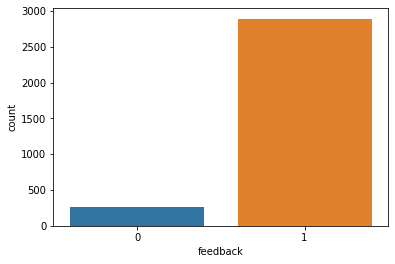

In [16]:
#base de dados desbalanciada, dificil classificar os negativos pq tem poucos exemplos
sns.countplot(x=df['feedback'], label = 'Count');

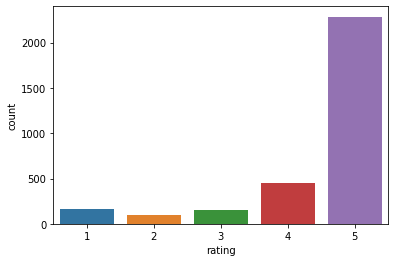

In [17]:
#outra forma de visualizar
sns.countplot(x='rating', data=df);

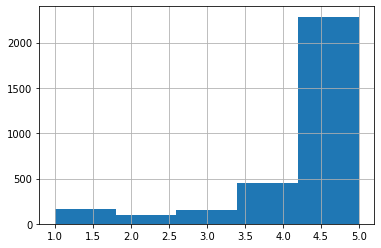

In [19]:
#histograma
df.rating.hist(bins=5);

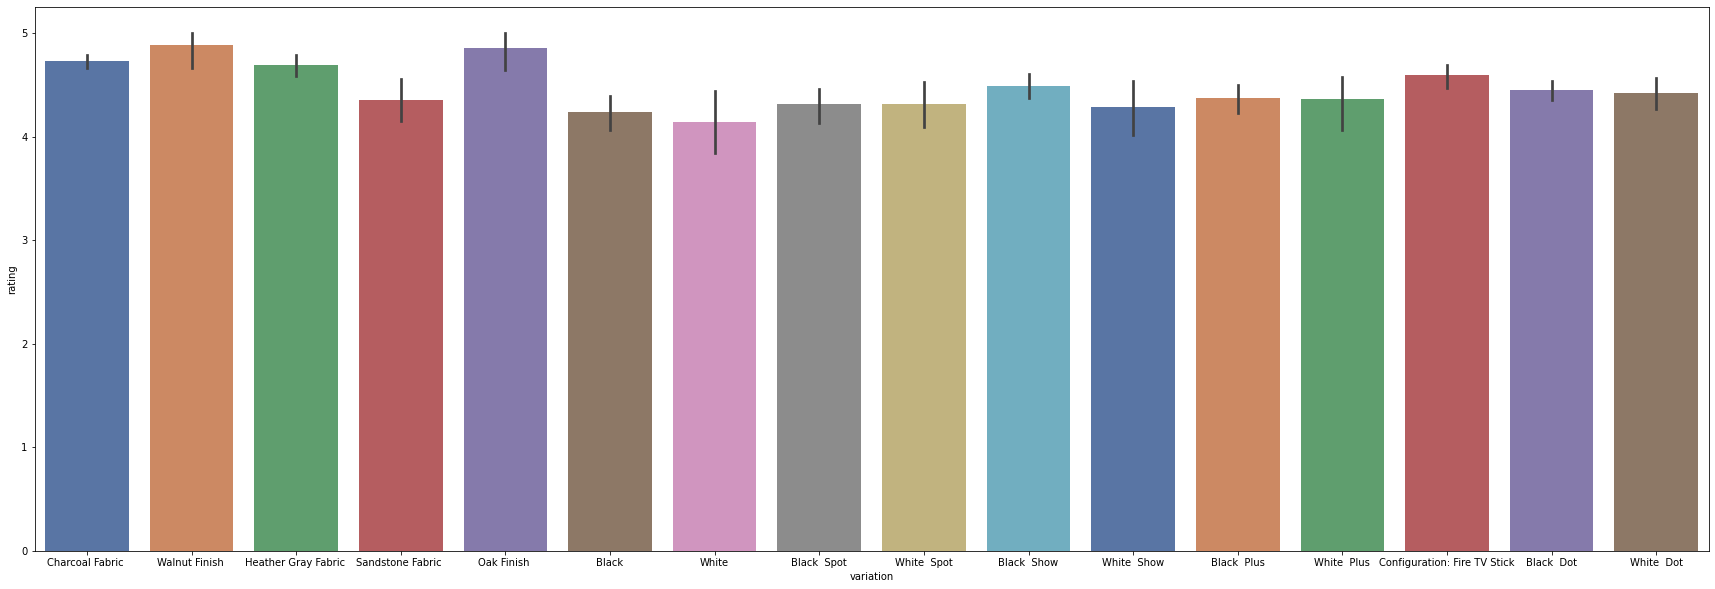

In [24]:
plt.figure(figsize=(30,10))
sns.barplot(x='variation', y='rating', data=df, palette='deep');

#Etapa 4: Tratamento

In [5]:
df = df.drop(['date', 'rating'], axis=1)
df

,variation,verified_reviews,feedback
0,Charcoal Fabric,Love my Echo!,1
1,Charcoal Fabric,Loved it!,1
2,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,Charcoal Fabric,Music,1
...,...,...,...
3145,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,Black Dot,"Listening to music, searching locations, check...",1
3147,Black Dot,"I do love these things, i have them running my...",1
3148,White Dot,Only complaint I have is that the sound qualit...,1


In [6]:
#tranformar as categoria em dummies
variation_dummies = pd.get_dummies(df['variation'])
variation_dummies

,Black,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3146,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3147,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3148,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [7]:
#pagar de uma forma direferente
df.drop(['variation'], axis=1, inplace=	True)
df

,verified_reviews,feedback
0,Love my Echo!,1
1,Loved it!,1
2,"Sometimes while playing a game, you can answer...",1
3,I have had a lot of fun with this thing. My 4 ...,1
4,Music,1
...,...,...
3145,"Perfect for kids, adults and everyone in betwe...",1
3146,"Listening to music, searching locations, check...",1
3147,"I do love these things, i have them running my...",1
3148,Only complaint I have is that the sound qualit...,1


In [8]:
#concatenar ao lado
df = pd.concat([df, variation_dummies], axis=1)
df

,verified_reviews,feedback,Black,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,Love my Echo!,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,Loved it!,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,"Sometimes while playing a game, you can answer...",1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,I have had a lot of fun with this thing. My 4 ...,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,Music,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,"Perfect for kids, adults and everyone in betwe...",1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3146,"Listening to music, searching locations, check...",1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3147,"I do love these things, i have them running my...",1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3148,Only complaint I have is that the sound qualit...,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


## tokenização

*   cria um vetor com cada palavra
*   para cada frase, contabiliza no vetor



In [9]:
from sklearn.feature_extraction.text import CountVectorizer

vetorizacao = CountVectorizer()
df_vetor = vetorizacao.fit_transform(df.verified_reviews)

df_vetor.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [10]:
#veriricar o tamanho, 4k colunas(palavras unicas)
df_vetor.shape

(3150, 4044)

In [11]:
#tipo do dado é uma matrix esparça
type(df_vetor)

scipy.sparse.csr.csr_matrix

In [12]:
print(vetorizacao.get_feature_names())

['00', '000', '07', '10', '100', '100x', '11', '1100sf', '12', '129', '12am', '15', '150', '18', '19', '1964', '1990', '1gb', '1rst', '1st', '20', '200', '2000', '2017', '229', '23', '24', '25', '29', '2nd', '2package', '30', '300', '30pm', '34', '360', '39', '3rd', '3x', '3xs', '40', '45', '48', '4am', '4ghz', '4k', '4th', '50', '54', '5am', '5ghz', '5th', '600', '62', '672', '6th', '70', '75', '79', '80', '80s', '81', '83', '85', '88', '888', '8gb', '90', '91', '911', '99', '_specifically_', 'a1', 'a19', 'abay', 'abc', 'abd', 'abilities', 'ability', 'able', 'abode', 'about', 'above', 'absolutely', 'absolutly', 'ac', 'accent', 'acceptable', 'accepting', 'access', 'accessable', 'accessible', 'accessing', 'accessories', 'accesss', 'accident', 'accidentally', 'accompanying', 'accomplish', 'accomplished', 'according', 'accordingly', 'account', 'accounts', 'accuracy', 'accurate', 'accurately', 'accustom', 'acknowledge', 'acoustical', 'across', 'act', 'acting', 'action', 'actions', 'activat

In [13]:
#transforma em um data frame
df_reviews = pd.DataFrame(df_vetor.toarray())
df_reviews

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,4004,4005,4006,4007,4008,4009,4010,4011,4012,4013,4014,4015,4016,4017,4018,4019,4020,4021,4022,4023,4024,4025,4026,4027,4028,4029,4030,4031,4032,4033,4034,4035,4036,4037,4038,4039,4040,4041,4042,4043
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3147,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3148,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [14]:
#deletar a coluna
df.drop(['verified_reviews'], axis=1, inplace=True)
#concatenar
df = pd.concat([df, df_reviews], axis=1)

df.head()

,feedback,Black,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,...,4004,4005,4006,4007,4008,4009,4010,4011,4012,4013,4014,4015,4016,4017,4018,4019,4020,4021,4022,4023,4024,4025,4026,4027,4028,4029,4030,4031,4032,4033,4034,4035,4036,4037,4038,4039,4040,4041,4042,4043
0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [15]:
#criar a variavel X
x = df.drop(['feedback'], axis=1)

#criar variavel Y
y = df['feedback']

print(y)
print(x)

0       1
1       1
2       1
3       1
4       1
       ..
3145    1
3146    1
3147    1
3148    1
3149    1
Name: feedback, Length: 3150, dtype: int64
      Black  Black  Dot  Black  Plus  Black  Show  ...  4040  4041  4042  4043
0         0           0            0            0  ...     0     0     0     0
1         0           0            0            0  ...     0     0     0     0
2         0           0            0            0  ...     0     0     0     0
3         0           0            0            0  ...     0     0     0     0
4         0           0            0            0  ...     0     0     0     0
...     ...         ...          ...          ...  ...   ...   ...   ...   ...
3145      0           1            0            0  ...     0     0     0     0
3146      0           1            0            0  ...     0     0     0     0
3147      0           1            0            0  ...     0     0     0     0
3148      0           0            0            0  ...   

In [16]:
#separar base de treino e teste, random_state para dividir sempre da mesma forma
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=5)

print(x_train.shape)
print(x_test.shape)

(2520, 4060)
(630, 4060)


#Etapa 5: Modelo

In [17]:
#modelo sequancial de camadas
model = tf.keras.models.Sequential()

#camada densa ou liga com todos os neuronios
model.add(tf.keras.layers.Dense(units=400, activation='relu', input_shape=(4060, )))
model.add(tf.keras.layers.Dense(units=400, activation='relu'))

#a saida vamos ter a probabilidade sigmoid entre 1 e 0
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

#problema de classificação binaria, conseito matematico de logaritimo binary_crossentropy
#metricas usamos acuracia
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

#1 milhao de parametros para a RN encontrar
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 400)               1624400   
_________________________________________________________________
dense_1 (Dense)              (None, 400)               160400    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 401       
Total params: 1,785,201
Trainable params: 1,785,201
Non-trainable params: 0
_________________________________________________________________


In [18]:
epochs_hist = model.fit(x_train, y_train, epochs = 10)#, batch_size = 50, validation_split = 0.2)

Epoch 1/10
79/79 [==============================] - 2s 12ms/step - loss: 0.3666 - accuracy: 0.9101
Epoch 2/10
79/79 [==============================] - 1s 12ms/step - loss: 0.0895 - accuracy: 0.9684
Epoch 3/10
79/79 [==============================] - 1s 12ms/step - loss: 0.0349 - accuracy: 0.9900
Epoch 4/10
79/79 [==============================] - 1s 12ms/step - loss: 0.0191 - accuracy: 0.9944
Epoch 5/10
79/79 [==============================] - 1s 12ms/step - loss: 0.0145 - accuracy: 0.9952
Epoch 6/10
79/79 [==============================] - 1s 11ms/step - loss: 0.0135 - accuracy: 0.9952
Epoch 7/10
79/79 [==============================] - 1s 12ms/step - loss: 0.0144 - accuracy: 0.9954
Epoch 8/10
79/79 [==============================] - 1s 12ms/step - loss: 0.0157 - accuracy: 0.9926
Epoch 9/10
79/79 [==============================] - 1s 12ms/step - loss: 0.0134 - accuracy: 0.9941
Epoch 10/10
79/79 [==============================] - 1s 12ms/step - loss: 0.0205 - accuracy: 0.9919


#Etapa 6: Avaliação

In [19]:
#importar as metricas
from sklearn.metrics import classification_report, confusion_matrix

In [20]:
#a funcao sigmid retorna a problabilidade
y_predicao_treino = model.predict(x_train)
y_predicao_treino

array([[1.        ],
       [1.        ],
       [1.        ],
       ...,
       [1.        ],
       [0.99986804],
       [0.9999975 ]], dtype=float32)

In [21]:
#converter para true ou false
y_predicao_treino = (y_predicao_treino>0.5)
y_predicao_treino

array([[ True],
       [ True],
       [ True],
       ...,
       [ True],
       [ True],
       [ True]])

In [22]:
#matrix de confução na base de treino
cm = confusion_matrix(y_train, y_predicao_treino)
cm

array([[ 186,   12],
       [   1, 2321]])

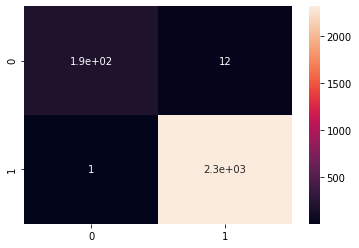

In [23]:
sns.heatmap(cm, annot=True);

In [24]:
#base test agora
y_predicao_test = model.predict(x_test)
y_predicao_test = (y_predicao_test>0.5)
cm = confusion_matrix(y_test, y_predicao_test)
cm

array([[ 22,  37],
       [  7, 564]])

In [42]:
# TP | FP
# FN | TN

print("Accuracy: " , (22+564)/(22+564+7+37) )
print("Error Rate: " , (7+37)/(22+564+7+37) )
print("Precision: " , (22)/(22+37) )
print("Recall: " , (22)/(22+7) )

Accuracy:  0.9301587301587302
Error Rate:  0.06984126984126984
Precision:  0.3728813559322034
Recall:  0.7586206896551724


In [40]:
from sklearn.metrics import precision_recall_fscore_support
print(precision_recall_fscore_support(y_test, y_predicao_test, average=None))
print(precision_recall_fscore_support(y_test, y_predicao_test, average='binary'))
print(precision_recall_fscore_support(y_test, y_predicao_test, average='micro'))
print(precision_recall_fscore_support(y_test, y_predicao_test, average='macro'))
print(precision_recall_fscore_support(y_test, y_predicao_test, average='weighted'))

(array([0.75862069, 0.93843594]), array([0.37288136, 0.98774081]), array([0.5       , 0.96245734]), array([ 59, 571]))
(0.9384359400998337, 0.9877408056042032, 0.9624573378839592, None)
(0.9301587301587302, 0.9301587301587302, 0.9301587301587302, None)
(0.848528314877503, 0.6803110807682033, 0.7312286689419796, None)
(0.9215960991851748, 0.9301587301587302, 0.9191478411614932, None)


In [25]:
epochs_hist.history.keys()

dict_keys(['loss', 'accuracy'])

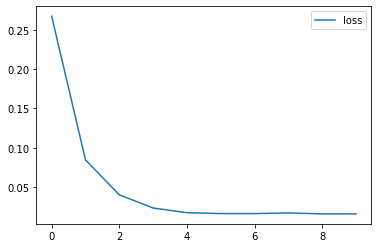

In [26]:
plt.plot(epochs_hist.history['loss'])
plt.legend(epochs_hist.history.keys());

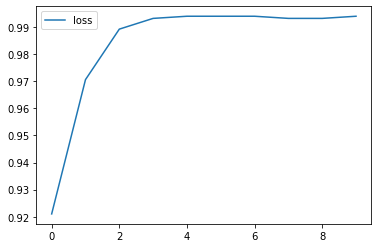

In [27]:
plt.plot(epochs_hist.history['accuracy'])
plt.legend(epochs_hist.history.keys());